In [ ]:
# This official dataset from the Medicare.gov Nursing Home Compare website allows for comparison of over 15,000 
# Medicare and Medicaid-certified nursing homes in the country.

In [ ]:
# Separate data collections include:

# Deficiencies, including fire safety, health, and inspection cycle types

# Ownership details, including ownership percentage

# Penalties, including filing date, fee, and payment date

# Provider details, including non or for profit status, staff ratings, and survey scores

# Quality MSR (Minimum Savings Rate) claims, including adjusted and observed scores

# MDS (Minimum Data Set) quality measures, scored on a quarterly basis

# State averages, including total number of quarterly deficiencies, and nurse staffing hours

# Survey summaries for each nursing home

In [ ]:
# This dataset was collected by Medicare.gov, and the original files can be accessed here.

In [52]:
import pandas as pd

# Define file paths
file_paths = {
    'deficiencies': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\deficiencies.csv',
    'ownership': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\ownership.csv',
    'penalties': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\penalties.csv',
    'provider_info': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\provider_info.csv',
    'quality_claims': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\quality_msr_claims.csv',
    'quality_mds': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\quality_msr_mds.csv',
    'state_averages': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\state_averages.csv',
    'survey_summary': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\survey_summary.csv'
}

# Define dtype_dict
dtype_dict = {
    'provnum': 'str',
    'PROVNUM': 'str',
    'provider_id': 'str',
}

def read_csv_in_chunks(file_path, dtype_dict, encoding='ISO-8859-1', chunksize=10000):
    chunks = pd.read_csv(file_path, dtype=dtype_dict, encoding=encoding, chunksize=chunksize, low_memory=False)
    df = pd.concat(chunks, ignore_index=True)
    return df

# Load datasets in chunks
dataframes = {name: read_csv_in_chunks(path, dtype_dict) for name, path in file_paths.items()}

# Rename columns to a common name 'provider_id'
for df in ['deficiencies', 'ownership', 'penalties', 'provider_info', 'quality_claims', 'quality_mds', 'state_averages', 'survey_summary']:
    dataframes[df].rename(columns={'provnum': 'provider_id', 'PROVNUM': 'provider_id'}, inplace=True)

# Optimize memory usage
def optimize_memory_usage(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category')
        elif df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

# Apply optimization
for df_name in dataframes:
    dataframes[df_name] = optimize_memory_usage(dataframes[df_name])

# Perform merges in stages to handle large data
df_combined = dataframes['provider_info'].join(dataframes['deficiencies'], how='left', rsuffix='_deficiencies')

# Merge in smaller stages
for df_name in ['ownership', 'penalties', 'quality_claims', 'quality_mds', 'state_averages', 'survey_summary']:
    df_combined = df_combined.join(dataframes[df_name], how='left', rsuffix=f'_{df_name}')
    # Clear memory for each DataFrame after use
    del dataframes[df_name]

# Final cleanup
import gc
gc.collect()

print("\nCombined dataset:")
print(df_combined.head())



Combined dataset:
  provider_id                                     PROVNAME  \
0      015009                     BURNS NURSING HOME, INC.   
1      015010                COOSA VALLEY NURSING FACILITY   
2      015012                   HIGHLANDS HEALTH AND REHAB   
3      015014  EASTVIEW REHABILITATION & HEALTHCARE CENTER   
4      015015                PLANTATION MANOR NURSING HOME   

                                    ADDRESS          CITY STATE    ZIP  \
0                      701 MONROE STREET NW  RUSSELLVILLE    AL  35653   
1                   315 WEST HICKORY STREET     SYLACAUGA    AL  35150   
2                       380 WOODS COVE ROAD    SCOTTSBORO    AL  35768   
3                  7755 FOURTH AVENUE SOUTH    BIRMINGHAM    AL  35206   
4  6450 OLD TUSCALOOSA HIGHWAY   P O BOX 97      MC CALLA    AL  35111   

        PHONE  COUNTY_SSA COUNTY_NAME                 OWNERSHIP  ...  \
0  2563324110         290    Franklin  For profit - Corporation  ...   
1  2562495604      

In [53]:
#Here's a summary of what the code accomplishes:

#Loading Data in Chunks: The data from each CSV file is read in chunks to prevent memory overflow.
#Renaming Columns: Standardizes column names to ensure consistent merging.
#Optimizing Memory Usage: Converts object columns to categorical types and downcasts numeric columns to save memory.
#Merging in Stages: Joins DataFrames in a staged manner to handle large datasets without exceeding memory limits.
#Memory Cleanup: Deletes intermediate DataFrames and uses garbage collection to free up memory.
#Next Steps
#Verify Results: Check the merged DataFrame (df_combined) to ensure the joins have been performed correctly and the data is as expected.
#Perform Additional Analysis: With the combined DataFrame, you can now proceed to any further analysis, visualizations, or modeling.

In [54]:
#Inspect the Data: Look at the structure, types, and summary statistics of your dataset to get a feel for the data.
#Data Types: Ensure the data types are appropriate for analysis (e.g., dates are in datetime format).
print(df_combined.info())
print(df_combined.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15644 entries, 0 to 15643
Columns: 249 entries, provider_id to filedate_survey_summary
dtypes: category(148), float32(66), float64(2), int16(7), int32(7), int64(1), int8(18)
memory usage: 27.0 MB
None
       provider_id              PROVNAME          ADDRESS     CITY  STATE  \
count        15644                 15644            15644    15644  15644   
unique       15644                 15335            15610     5328     54   
top         676396  MILLER'S MERRY MANOR  N2665 CTY RD QQ  CHICAGO     TX   
freq             1                    30                4       82   1212   
mean           NaN                   NaN              NaN      NaN    NaN   
std            NaN                   NaN              NaN      NaN    NaN   
min            NaN                   NaN              NaN      NaN    NaN   
25%            NaN                   NaN              NaN      NaN    NaN   
50%            NaN                   NaN              Na

In [55]:
#Data Cleaning and Preparation
#Handle Missing Values: Check for and address missing values. You can choose to fill them in, drop rows/columns, or use 
#imputation methods.

In [56]:
#Understanding the data
#Inspect the Data: Look at the structure, types, and summary statistics of your dataset to get a feel for the data.
#Data Types: Ensure the data types are appropriate for analysis (e.g., dates are in datetime format).
print(df_combined.info())
print(df_combined.describe(include='all'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15644 entries, 0 to 15643
Columns: 249 entries, provider_id to filedate_survey_summary
dtypes: category(148), float32(66), float64(2), int16(7), int32(7), int64(1), int8(18)
memory usage: 27.0 MB
None
       provider_id              PROVNAME          ADDRESS     CITY  STATE  \
count        15644                 15644            15644    15644  15644   
unique       15644                 15335            15610     5328     54   
top         676396  MILLER'S MERRY MANOR  N2665 CTY RD QQ  CHICAGO     TX   
freq             1                    30                4       82   1212   
mean           NaN                   NaN              NaN      NaN    NaN   
std            NaN                   NaN              NaN      NaN    NaN   
min            NaN                   NaN              NaN      NaN    NaN   
25%            NaN                   NaN              NaN      NaN    NaN   
50%            NaN                   NaN              Na

In [57]:
# Data Cleaning and Preparation
# Handle Missing Values: Check for and address missing values. You can choose to fill them in, drop rows/columns, or use imputation methods.
print(df_combined.isnull().sum())


provider_id                0
PROVNAME                   0
ADDRESS                    0
CITY                       0
STATE                      0
                          ..
F_SMOKE_CONTROL_N          0
F_SMOKING_REG_N            0
F_SPRINKLER_N              0
F_VERT_OPENINGS_N          0
filedate_survey_summary    0
Length: 249, dtype: int64


In [58]:
#Convert Data Types: Ensure that date columns are in the correct format and categorical columns are appropriately encoded.
df_combined['filedate_survey_summary'] = pd.to_datetime(df_combined['filedate_survey_summary'])

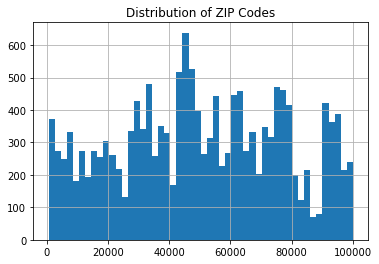

For profit - Corporation                  9017
Non profit - Corporation                  2803
For profit - Partnership                  1069
For profit - Individual                    647
Non profit - Church related                579
Government - County                        539
Non profit - Other                         299
Government - Hospital district             237
Government - State                         156
Government - City/county                   104
For profit - Limited Liability company     104
Government - City                           78
Government - Federal                        12
Name: OWNERSHIP, dtype: int64


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of a numerical column
df_combined['ZIP'].hist(bins=50)
plt.title('Distribution of ZIP Codes')
plt.show()

# Example: Value counts for a categorical column
print(df_combined['OWNERSHIP'].value_counts())


In [60]:
#here is some operational fire safety side of things lets say we want to locate  sprinklers and smoke detectors.

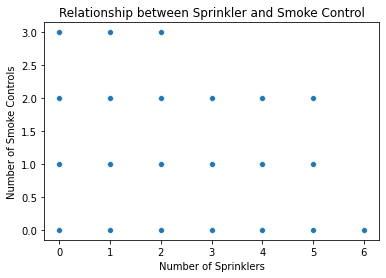

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert columns to numeric and handle non-numeric values
df_combined['F_SPRINKLER_N'] = pd.to_numeric(df_combined['F_SPRINKLER_N'], errors='coerce')
df_combined['F_SMOKE_CONTROL_N'] = pd.to_numeric(df_combined['F_SMOKE_CONTROL_N'], errors='coerce')

# Handle missing values (optional: drop rows with NaN values)
df_combined.dropna(subset=['F_SPRINKLER_N', 'F_SMOKE_CONTROL_N'], inplace=True)

# Scatter plot to examine the relationship between two numerical variables
sns.scatterplot(x='F_SPRINKLER_N', y='F_SMOKE_CONTROL_N', data=df_combined)
plt.title('Relationship between Sprinkler and Smoke Control')
plt.xlabel('Number of Sprinklers')
plt.ylabel('Number of Smoke Controls')
plt.show()


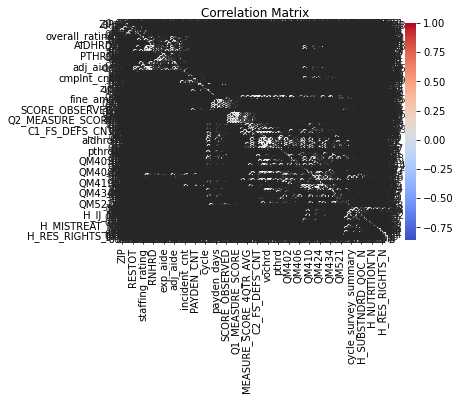

In [62]:
#Correlation Analysis: Check for correlations between numerical variables.

correlation_matrix = df_combined.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [63]:
#Group Analysis: Compare statistics across different groups.
group_stats = df_combined.groupby('OWNERSHIP').mean()
print(group_stats)


                                                 ZIP         PHONE  \
OWNERSHIP                                                            
For profit - Corporation                51520.403904  5.867017e+09   
For profit - Individual                 53387.846749  6.108584e+09   
For profit - Limited Liability company  60638.067308  5.787046e+09   
For profit - Partnership                48194.278765  6.008887e+09   
Government - City                       57637.756410  4.648738e+09   
Government - City/county                50641.096154  5.646382e+09   
Government - County                     47863.403346  5.881760e+09   
Government - Federal                    67103.166667  5.914558e+09   
Government - Hospital district          74195.763713  5.891082e+09   
Government - State                      52865.179487  6.001136e+09   
Non profit - Church related             48449.345423  5.782636e+09   
Non profit - Corporation                44756.434534  5.786959e+09   
Non profit - Other  

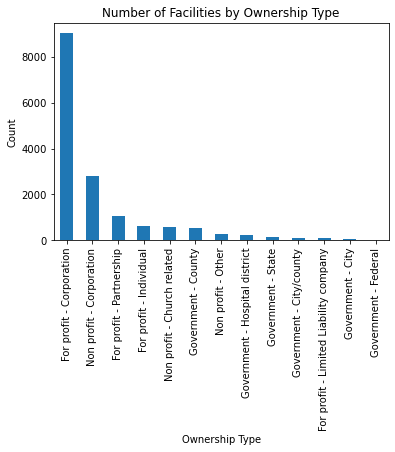

In [64]:
#Graphs and Charts: Create visualizations to communicate insights clearly.
# Example: Bar plot for ownership types
df_combined['OWNERSHIP'].value_counts().plot(kind='bar')
plt.title('Number of Facilities by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Count')
plt.show()


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Print columns to find the correct target column
print(df_combined.columns)

# Replace 'F_SPRINKLER_N' with the actual column you want to predict
target_column = 'F_SPRINKLER_N'  # Example target column

# Prepare data for modeling
X = df_combined[['F_SPRINKLER_N', 'F_SMOKE_CONTROL_N']]  # Example features
y = df_combined[target_column]  # Use the actual target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print classification report
print(classification_report(y_test, predictions))


Index(['provider_id', 'PROVNAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'PHONE',
       'COUNTY_SSA', 'COUNTY_NAME', 'OWNERSHIP',
       ...
       'F_INTERIOR_N', 'F_LABORATORIES_N', 'F_MEDICAL_GAS_N',
       'F_MISCELLANEOUS_N', 'F_SERVICE_EQUIPMENT_N', 'F_SMOKE_CONTROL_N',
       'F_SMOKING_REG_N', 'F_SPRINKLER_N', 'F_VERT_OPENINGS_N',
       'filedate_survey_summary'],
      dtype='object', length=249)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1767
         1.0       1.00      1.00      1.00       997
         2.0       1.00      1.00      1.00       286
         3.0       1.00      1.00      1.00        63
         4.0       0.94      1.00      0.97        15
         5.0       0.00      0.00      0.00         1

    accuracy                           1.00      3129
   macro avg       0.82      0.83      0.83      3129
weighted avg       1.00      1.00      1.00      3129



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
#Reporting and Documentation
#Document Findings: Create reports or dashboards to summarize insights and share findings.
#Save Cleaned Data: Export the cleaned and processed data for future use.
#where does file save?
#df_combined.to_csv('cleaned_combined_data.csv', index=False)


In [67]:
df_combined.columns = df_combined.columns.str.strip()


In [68]:
# Print all column names in the DataFrame
print(df_combined.columns)


Index(['provider_id', 'PROVNAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'PHONE',
       'COUNTY_SSA', 'COUNTY_NAME', 'OWNERSHIP',
       ...
       'F_INTERIOR_N', 'F_LABORATORIES_N', 'F_MEDICAL_GAS_N',
       'F_MISCELLANEOUS_N', 'F_SERVICE_EQUIPMENT_N', 'F_SMOKE_CONTROL_N',
       'F_SMOKING_REG_N', 'F_SPRINKLER_N', 'F_VERT_OPENINGS_N',
       'filedate_survey_summary'],
      dtype='object', length=249)


In [69]:
# Potential Features for Predictive Modeling:
# F_INTERIOR_N: Number of features or issues related to the interior of the facility.
# F_LABORATORIES_N: Number of laboratories within the facility.
# F_MEDICAL_GAS_N: Number of medical gas features or issues.
# F_MISCELLANEOUS_N: Miscellaneous features that may impact the facility.
# F_SERVICE_EQUIPMENT_N: Number of service equipment items.
# F_SMOKE_CONTROL_N: Number of smoke control features.
# F_SMOKING_REG_N: Number of smoking regulations or related features.
# F_SPRINKLER_N: Number of sprinklers in the facility.
# F_VERT_OPENINGS_N: Number of vertical openings in the facility

In [70]:
# Project Title: Analyzing Safety and Compliance Features in Nursing Home Facilities

In [71]:
# Objective:
#To analyze the safety and compliance features in nursing home facilities and their potential impact on facility operations, 
# focusing on identifying key features related to safety and compliance.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# Define file paths
file_paths = {
    'deficiencies': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\deficiencies.csv',
    'ownership': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\ownership.csv',
    'penalties': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\penalties.csv',
    'provider_info': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\provider_info.csv',
    'quality_claims': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\quality_msr_claims.csv',
    'quality_mds': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\quality_msr_mds.csv',
    'state_averages': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\state_averages.csv',
    'survey_summary': r'C:\Users\Michael Lam\Desktop\Nursinghomemedicaredata\survey_summary.csv'
}

# Define dtype_dict
dtype_dict = {
    'provnum': 'str',
    'PROVNUM': 'str',
    'provider_id': 'str',
}

def read_csv_in_chunks(file_path, dtype_dict, encoding='ISO-8859-1', chunksize=10000):
    chunks = pd.read_csv(file_path, dtype=dtype_dict, encoding=encoding, chunksize=chunksize, low_memory=False)
    df = pd.concat(chunks, ignore_index=True)
    return df

# Load datasets in chunks
dataframes = {name: read_csv_in_chunks(path, dtype_dict) for name, path in file_paths.items()}

# Rename columns to a common name 'provider_id'
for df in ['deficiencies', 'ownership', 'penalties', 'provider_info', 'quality_claims', 'quality_mds', 'state_averages', 'survey_summary']:
    dataframes[df].rename(columns={'provnum': 'provider_id', 'PROVNUM': 'provider_id'}, inplace=True)

# Optimize memory usage
def optimize_memory_usage(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category')
        elif df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

# Apply optimization
for df_name in dataframes:
    dataframes[df_name] = optimize_memory_usage(dataframes[df_name])

# Perform merges in stages to handle large data
df_combined = dataframes['provider_info'].join(dataframes['deficiencies'], how='left', rsuffix='_deficiencies')

# Merge in smaller stages
for df_name in ['ownership', 'penalties', 'quality_claims', 'quality_mds', 'state_averages', 'survey_summary']:
    df_combined = df_combined.join(dataframes[df_name], how='left', rsuffix=f'_{df_name}')
    # Clear memory for each DataFrame after use
    del dataframes[df_name]

# Final cleanup
gc.collect()

print("\nCombined dataset:")
print(df_combined.head())



Combined dataset:
  provider_id                                     PROVNAME  \
0      015009                     BURNS NURSING HOME, INC.   
1      015010                COOSA VALLEY NURSING FACILITY   
2      015012                   HIGHLANDS HEALTH AND REHAB   
3      015014  EASTVIEW REHABILITATION & HEALTHCARE CENTER   
4      015015                PLANTATION MANOR NURSING HOME   

                                    ADDRESS          CITY STATE    ZIP  \
0                      701 MONROE STREET NW  RUSSELLVILLE    AL  35653   
1                   315 WEST HICKORY STREET     SYLACAUGA    AL  35150   
2                       380 WOODS COVE ROAD    SCOTTSBORO    AL  35768   
3                  7755 FOURTH AVENUE SOUTH    BIRMINGHAM    AL  35206   
4  6450 OLD TUSCALOOSA HIGHWAY   P O BOX 97      MC CALLA    AL  35111   

        PHONE  COUNTY_SSA COUNTY_NAME                 OWNERSHIP  ...  \
0  2563324110         290    Franklin  For profit - Corporation  ...   
1  2562495604      

In [73]:
# Summary statistics for numerical features
print(df_combined.describe())


                ZIP         PHONE    COUNTY_SSA      BEDCERT        RESTOT  \
count  15644.000000  1.564400e+04  15644.000000  15644.00000  15644.000000   
mean   50214.443876  5.861956e+09    388.372603    106.14766     86.152071   
std    26943.801430  2.327844e+09    273.795642     60.99036     54.134346   
min      660.000000  2.012270e+09      0.000000      2.00000      1.000000   
25%    29649.000000  3.867372e+09    150.000000     64.00000     51.000000   
50%    48866.500000  6.056447e+09    360.000000     99.00000     78.000000   
75%    72620.000000  8.013602e+09    590.000000    128.00000    109.000000   
max    99929.000000  1.000000e+10    996.000000   1389.00000    757.000000   

       overall_rating  survey_rating  quality_rating  staffing_rating  \
count    15506.000000   15506.000000    15478.000000      15202.00000   
mean         3.186895       2.812460        3.397080          3.23043   
std          1.403597       1.283904        1.395096          1.15702   
min  